In [13]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np

In [14]:
newgroups_train = fetch_20newsgroups(subset='train')
print(list(newgroups_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [15]:
categories = ['alt.atheism', 'comp.graphics', 'rec.motorcycles']

In [16]:
dataset = fetch_20newsgroups(subset='all', categories=categories,
shuffle=True, random_state=2017)

In [17]:
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

2768 documents
3 categories


In [18]:
labels = dataset.target
labels

array([1, 1, 2, ..., 0, 2, 2])

In [19]:
print("Extracting features from the dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the dataset using a sparse vectorizer
n_samples: 2768, n_features: 35311


In [20]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

svd = TruncatedSVD(200) #reduce the dimensionality to 2000
lsa = make_pipeline(svd, Normalizer(copy=False))

X = lsa.fit_transform(X)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 33%


**k-means clustering**

In [23]:
km = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)

# Scikit learn provides MiniBatchKMeans to run k-means in batch mode suitable for a very large corpus
# km = MiniBatchKMeans(n_clusters=5, init='k-means++', n_init=1, init_size=1000, batch_size=1000)

print("Clustering sparse data with %s" % km)
km.fit(X)
km.cluster_centers_

Clustering sparse data with KMeans(max_iter=100, n_clusters=3, n_init=1)


array([[ 2.22416361e-01, -1.09003234e-01, -1.03827819e-01,
         1.46204293e-01,  4.02581927e-02, -1.52550833e-02,
         2.14283879e-02,  1.09758916e-02, -1.07514293e-02,
        -5.60613945e-03, -3.85422006e-03,  7.25942521e-04,
         9.09039922e-03,  3.76121999e-03, -1.02118550e-03,
         9.21753991e-03,  4.00159955e-03,  8.90095648e-04,
        -4.91182573e-03,  1.77486019e-02,  1.58195352e-02,
         3.91966524e-03,  9.78442468e-03, -1.02696540e-02,
        -8.75377023e-04,  5.04290435e-03, -6.17627149e-04,
         1.32576005e-02, -1.63698499e-02,  1.05739109e-03,
         4.52977216e-05,  8.28950280e-03,  4.61500590e-03,
        -6.60125032e-03,  1.54355839e-02, -2.96796552e-03,
        -6.85305734e-03,  1.52834179e-03, -5.17090964e-03,
        -6.55149096e-05,  5.61826156e-03, -2.30425524e-03,
        -6.94356507e-03, -8.03367230e-03, -3.35184695e-03,
        -6.22685701e-03, -3.94712295e-03,  1.16358659e-02,
        -4.19968246e-03, -2.02057145e-03, -2.45500025e-0

In [24]:
print("Top terms per cluster:")
original_space_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
        
terms = vectorizer.get_feature_names_out()
for i in range(3):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: edu graphics image university thanks lines subject 3d program organization
Cluster 1: edu god keith people com writes atheists don religion think
Cluster 2: com bike edu dod writes ca article organization subject lines


**Hierarchical clustering**

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
dist = 1 - cosine_similarity(X)

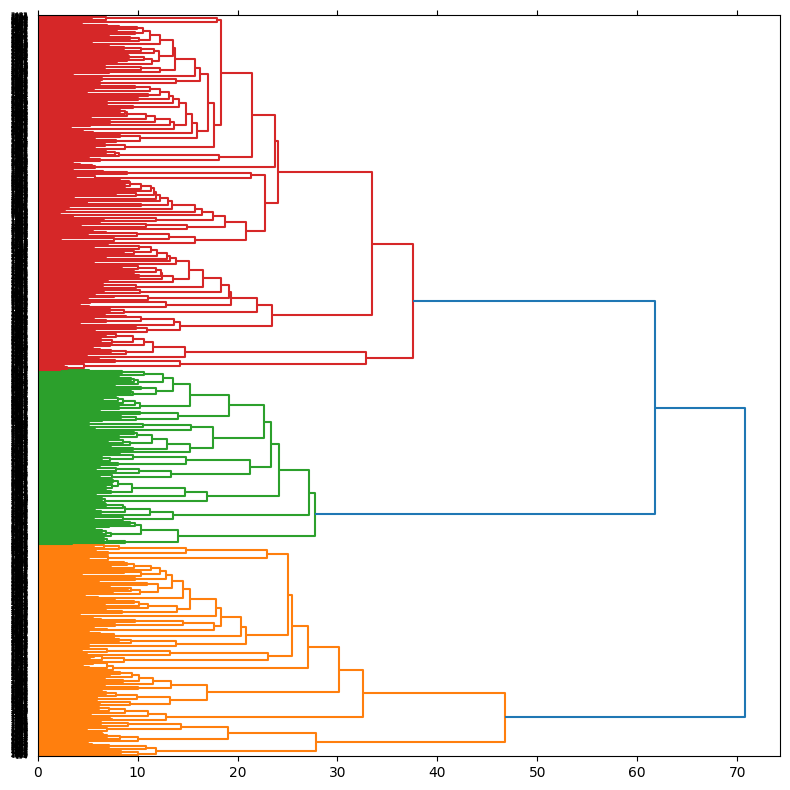

In [28]:
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(8, 8)) # set size
ax = dendrogram(linkage_matrix, orientation="right")

plt.tick_params(axis= 'x', which='both', bottom='off', top='off', labelbottom='off')

plt.tight_layout() #show plot with tight layout
plt.show()